# STUDENT ALCOHOL CONSUMPTION

All'inizio sarà analizzato il dataset e le relazioni tra le sue variabili.

Una volta completatata l’analisi esplorativa saranno addestrati e confrontati più modelli, indicando quello che otterrà le migliori prestazioni. 

Per ogni modello, saranno scelti gli iperparametri che produrranno i risultati migliori
I modelli saranno valutati con le metriche di valutazione dell'R quadro, l'MSE, il RMSE e il MAE.
Le conclusioni sono esposte nel file di presentazione esteso presente nella stessa repository di questo file


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans                           # conda install -c anaconda py-kmeans  
from kneed import KneeLocator
 
import hdbscan                                               # conda install -c anaconda py-hdbscan              
from sklearn.model_selection import RandomizedSearchCV


import xgboost                                               # conda install -c anaconda py-xgboost
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

import warnings 

from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')


from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor

from IPython.display import Image
from IPython.core.display import HTML

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')

# EDA

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(df1.corr(), annot=True)
plt.show()

Better performances in early and mid term is usually linked to better performances in final exams.

Interestingly, Mother education and Father education seem to be correlated; both this features are positively correlated with the student mark

A high go out count is positively correlated with higher alcohol consumption.

The number of failures is negatively correlated with marks.



Alcohol consumption doesn't seem to have a strong linear correlation with academic performance.

In [ ]:
print(f"Unique values of workday alcohol consumption (Dalc): {df1['Dalc'].unique().tolist()}")
print(f"Unique values of weekend alcohol consumption (Walc): {df1['Walc'].unique().tolist()}")
print(f"Students drink alcohol at least {min((df1['Dalc'] + df1['Walc']).unique().tolist())} times in a week")

In [ ]:
df1['Talc'] = round((df1['Dalc'] + df1['Walc'])/2,0)
print(((df1['Dalc'] + df1['Walc'])/2).unique().tolist())
print(f"Unique values of total alcohol consumption (Talc): {df1['Talc'].unique().tolist()}")

In [ ]:
df1['Talc'].value_counts()

In [ ]:
#Total alcool consumption -> Talc

list = []
for i in range(5):
    list.append(len(df1[df1.Talc == i+1]))
ax = sns.barplot(x = [1,2,3,4,5], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Level of Alcohol consumption')

Most students have low/moderate weekly alcohol consumption.

In [3]:
df1.isnull().sum()

NameError: name 'df1' is not defined

In [ ]:
df1['Avg_mark']= (df1['G1']+df1['G2']+df1['G3'])/3
df1[['G1','G2','G3','Avg_mark']].describe()

As the values of G1, G2, G3 give almost the same information they have been averaged in a single value "Avg Mark"

In [ ]:
sizes_G3 = []
for i in range(1,6):
    sizes_G3.append(sum(df1[df1.Talc == i].G3))
total_G3 = sum(sizes_G3)
G3_average = total_G3/float(len(df1))
print(f"Total score for the final grade: {total_G3}")
print(f"Average of the final grade over all the dataset: {G3_average}")


labels = ['1','2','3','4','5']
colors = ['lime','blue','orange','cyan','grey']
explode = [0,0,0,0,0]
plt.pie(sizes_G3,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_G3))
plt.xlabel('Students final grade distribution according to weekly alcohol consumption')

In [ ]:
sizes_avg = []
for i in range(1,6):
    sizes_avg.append(sum(df1[df1.Talc == i].Avg_mark))
total_avg_mark = sum(sizes_avg)
mark_average = total_avg_mark/float(len(df1))
print(f"Total score for the average mark: {total_avg_mark}")
print(f"Average of the average mark over all the dataset: {mark_average}")

labels = ['1','2','3','4','5']
colors = ['lime','blue','orange','cyan','grey']
explode = [0,0,0,0,0]
plt.pie(sizes_avg,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_avg_mark))
plt.xlabel('Students final grade distribution according to weekly alcohol consumption')

In [ ]:
f, axes=plt.subplots(2,1,figsize=(15,14))

pd.Series({item:df1[df1.Talc==item]['G3'].mean() for item in df1.Talc.unique()}).sort_values().plot(kind='barh', 
             title='How Alcohol Consumption Influences the average final grade (G3)',
            xlabel='Level of Total Alcohol Consumption', ax=axes[0])

pd.Series({item:df1[df1.Talc==item]['Avg_mark'].mean() for item in df1.Talc.unique()}).sort_values().plot(kind='barh', 
             title='How Alcohol Consumption Influences the average yearly mark',
            xlabel='Level of Total Alcohol Consumption', ax=axes[1])

plt.show()

Students who have low/moderate weekly alcohol consumption in a week more tends to have better academic performance. 

In [4]:
# A swarm plot is a type of scatter plot that is used for representing categorical values.


avg_res = sum(df1.Avg_mark)/float(len(df1))
df1['avg_line'] = avg_res
df1['average'] = ['above average' if i > avg_res else 'under average' for i in df1.Avg_mark]
sns.swarmplot(x='Talc', y = 'Avg_mark', hue = 'average',data= df1,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

NameError: name 'df1' is not defined

Most of the students with an alcohol consumption of level of 3 and 4 perform under average
Alcohol consumption levels of 1, 2 and 5 don't seem directly linked with a specific level of academic performance

In [ ]:
for i in [1.0, 2.0, 3.0, 4.0, 5.0]:
    avg_per_Talc = sum(df1[df1.Talc == i].Avg_mark)/float(len(df1[df1.Talc == i])) 
    perc_passing = len(df1[(df1.Talc == i) & (df1.average == 'above average')])/len(df1[df1.average == 'above average'])
    print(f"Percentage of students with {i} value of Talc that has above average grade is {perc_passing}")

In [ ]:
f, axes=plt.subplots(2,1,figsize=(20,30))

sns.boxplot(data=df1, x='Talc', y='absences', ax=axes[0]).set(title='How the level of weekly alcohol consumption influences the number of absences')

sns.boxplot(data=df1, x='Talc', y='failures', ax=axes[1]).set(title='How the level of weekly alcohol consumption influences the number of failures')

plt.show()

The higher the weekly alcohol consumption the higher the median value and maxiumum of absences and failures.

In [ ]:
f, axes=plt.subplots(6,2, figsize=(20,30))
plt.subplots_adjust(hspace=0.5)

for i,feature in enumerate(['famsize','Pstatus','sex','school','Mjob','Fjob','failures',
                  'higher','famrel','freetime','goout','health']):
    df1.groupby(feature)['Talc'].mean().sort_values().plot(kind='barh', ax=axes[i//2, i%2],
                            title='How '+feature.capitalize()+' Influences Alcohol Consumption')
    
plt.show()

# x:  alcohol consumption mean level value
# y:  feature 

# ENCODING

In [ ]:
df1.drop(['avg_line','average'], axis=1, inplace=True)
df1['Talc'] = df1['Talc'].astype(np.int64)
df1.dtypes

In [5]:
nonnumeric_columns = [df1.columns[index] for index, dtype in enumerate(df1.dtypes) if dtype == 'object']
nonnumeric_columns

NameError: name 'df1' is not defined

In [ ]:
numeric_columns = [df1.columns[index] for index, dtype in enumerate(df1.dtypes) if dtype == 'int64']
numeric_columns

In [ ]:
numeric_columns.remove("Dalc")
numeric_columns.remove("Walc")
numeric_columns.remove("G1")
numeric_columns.remove("G2")
numeric_columns.remove("G3")#avoid linear dependance in model, average of the three marks is target vector

In [ ]:
for column in nonnumeric_columns:
    print(f"{column}: {df1[column].unique()}")

In [ ]:
cat_label_list = ['Mjob','Fjob', 'reason','guardian']

In [ ]:
one_hot_enc_list = [x for x in nonnumeric_columns if x not in cat_label_list]

In [6]:
one_hot_enc_list

NameError: name 'one_hot_enc_list' is not defined

In [ ]:
X_cat_l = df1[cat_label_list] #only categorical labels
X_cat_oh = df1[one_hot_enc_list] #only categorical onehot columns(cioè 0 o 1)
X_num = df1[numeric_columns] #only numerical columns
label = ['Avg_mark'] # target
feat_names = one_hot_enc_list+ cat_label_list+ numeric_columns # feature list

In [ ]:
feat_names

In [ ]:
''' The fit method is calculating the mean and variance of each of the features present in our data. 
The transform method is transforming all the features using the respective mean and variance.
'''

X_cat_l = X_cat_l.apply(LabelEncoder().fit_transform)
X_cat_l.shape

In [ ]:
X_cat_l.describe()

In [ ]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
X_cat_oh = ohe.fit_transform(X_cat_oh)
X_cat_oh

In [ ]:
X = np.concatenate([X_cat_oh, X_cat_l, X_num], axis=1)

X

In [ ]:
y = df1[label].values


In [7]:
y

NameError: name 'y' is not defined

In [ ]:
X

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X

In [ ]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

NameError: name 'X' is not defined

In [ ]:
result = {}

# LINEAR REGRESSION

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

In [ ]:
y_lr_pred=model_lr.predict(X_test)

In [ ]:
r_2_lr = round(r2_score(y_test, y_lr_pred),4)
print(f"Model R2: {r_2_lr}")

In [ ]:
coef_list = model_lr.coef_

In [9]:
coef_list

NameError: name 'coef_list' is not defined

In [ ]:
importance = coef_list[0]

In [ ]:
# summarize feature importance
arg_sort_coef_list = np.argsort(coef_list[0], axis=- 1)

In [ ]:
importance = np.sort(coef_list[0], axis=- 1)

In [ ]:
feat_names_lr_sorted =  np.array(feat_names)[arg_sort_coef_list]

In [ ]:
for i,v in enumerate(importance):
    print('Feature: {} Importance: {}'.format(feat_names_lr_sorted[i],v))
    

Negative number: inverse correlation (the lower the value of that feature the higher the value of the average mark)
Positive number: linear correlation (the higher the value of that feature the higher the value of the average mark)

Number of failures, level of going out with friends,  level of family educational support are the feature with the highest negative correlation with academic performance

The desire of pursuing a higher education, studytime, Mother's education Importance are the feature with the highest negative correlation with academic performance


In [10]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

NameError: name 'importance' is not defined

In [ ]:
MSE_lr = round(mean_squared_error(y_test, y_lr_pred),4)
print("MSE linear: %f" % MSE_lr)
result['MSE linear'] = MSE_lr

In [ ]:
RMSE_lr = round(mean_squared_error(y_test, y_lr_pred, squared=False),4)
print("RMSE linear: %f" % RMSE_lr)
result['RMSE linear'] = RMSE_lr

In [ ]:
MAE_lr = round(mean_absolute_error(y_test, y_lr_pred),4)
print("MAE linear: %f" % MAE_lr)
result['MAE linear'] = MAE_lr

In [ ]:
#r2_score_tree = round(r2_score(y_test, y_pred_test),4)
#print("R2 test tree: %f" % r2_score_tree)
result['R2 linear'] = r_2_lr

# KNN

NameError: name 'X_train' is not defined

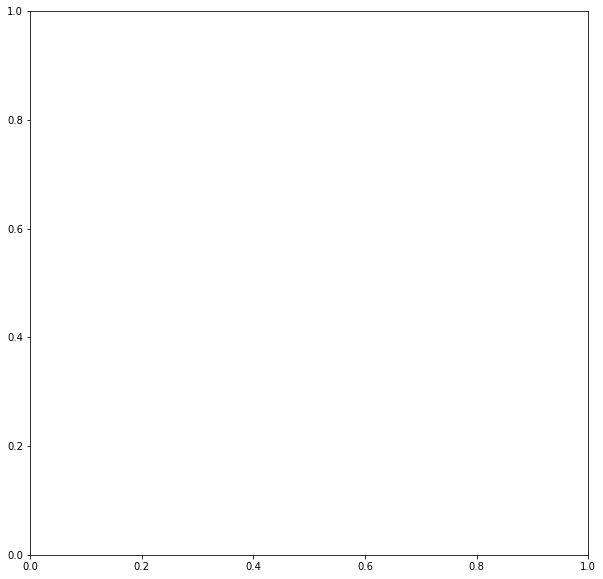

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,100,1)
knn_dict={} # To store k and mse pairs

for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)

    #Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse

#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.xaxis.set_ticks(np.arange(-0, 99, 3))
ax.set_title('ELBOW PLOT' ,fontsize=28)

16 Neighbours give the lowest mean squared error

In [ ]:
knn=KNeighborsRegressor(n_neighbors=16)
model_knn=knn.fit(X_train,y_train)
y_knn_pred=model_knn.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_knn_pred)

In [ ]:
r_2_knn = r2_score(y_test, y_knn_pred)

In [ ]:
r_2_knn

In [ ]:
r2_score_knn = round(r_2_knn,5)
result['R2 knn'] = r2_score_knn

In [ ]:
MAE_knn = round(mean_absolute_error(y_test, y_knn_pred),4)
print("MAE knn: %f" % MAE_knn)
result['MAE knn'] = MAE_knn

In [ ]:
RMSE_knn = round(mean_squared_error(y_test, y_knn_pred, squared=False),4)
print("RMSE knn: %f" % RMSE_knn)
result['RMSE knn'] = RMSE_knn

In [ ]:
MSE_knn = round(mean_squared_error(y_test, y_knn_pred),4)
print("MSE knn: %f" % MSE_knn)
result['MSE knn'] = MSE_knn

# DECISION TREE 

In [ ]:
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=42),
              param_grid={'max_depth': range(1, 10), 'min_samples_leaf':range(1,5)})

g_cv.fit(X_train, y_train)
print('Best calculated parameters for Decision Tree Regressor is: {}'.format(g_cv.best_params_))

In [ ]:
model_dt=g_cv.best_estimator_

y_dt_pred=model_dt.predict(X_test)

In [ ]:
r2_dt = round(r2_score(y_test, y_dt_pred),4)
r2_dt

In [ ]:
MSE_tree = round(mean_squared_error(y_test, y_dt_pred),4)
print("MSE tree: %f" % MSE_tree)
result['MSE tree'] = MSE_tree

In [ ]:
RMSE_tree = round(mean_squared_error(y_test, y_dt_pred, squared=False),4)
print("RMSE tree: %f" % RMSE_tree)
result['RMSE tree'] = RMSE_tree

In [ ]:
MAE_tree = round(mean_absolute_error(y_test, y_dt_pred),4)
print("MAE tree: %f" % MAE_tree)
result['MAE tree'] = MAE_tree

In [ ]:
result['R2 tree'] = r2_dt

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt, 
                   feature_names=feat_names,  
                   class_names=label,
                   filled=True)

In [ ]:
X = pd.DataFrame(X)

#Per calcolare l’importanza delle caratteristiche

importances = pd.DataFrame({'feature':feat_names ,'importance':np.round(model_dt.feature_importances_,6)}) 
importances = importances.sort_values('importance',ascending=False)
importances

# RANDOM FOREST

In [ ]:
g_cv = GridSearchCV(RandomForestRegressor(random_state=42),
              param_grid={'n_estimators': range(1, 50)})

g_cv.fit(X_train, y_train)
print('Best calculated parameters for Random Forest Regressor is: {}'.format(g_cv.best_params_))

In [ ]:
model_rf=g_cv.best_estimator_

y_rf_pred=model_rf.predict(X_test)

In [ ]:
r2_rf = round(r2_score(y_test, y_rf_pred),4)
r2_rf

In [ ]:
result['R2 forest'] = r2_rf

In [ ]:
MSE_tree = round(mean_squared_error(y_test, y_rf_pred),4)
print("MSE forest: %f" % MSE_tree)
result['MSE forest'] = MSE_tree

In [ ]:
RMSE_tree = round(mean_squared_error(y_test, y_rf_pred, squared=False),4)
print("RMSE forest: %f" % RMSE_tree)
result['RMSE forest'] = RMSE_tree

In [ ]:
MAE_tree = round(mean_absolute_error(y_test, y_rf_pred),4)
print("MAE forest: %f" % MAE_tree)
result['MAE forest'] = MAE_tree

In [ ]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feat_names)

fig, ax = plt.subplots(figsize=(15,5))

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The higher the mean reduction in impurity the higher the importance of the featur
The black bar is standard deviation, the longer the bar the higher the difference between the members of the group and the mean value of the feature

# KMEANS

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,               
    max_iter=300,
    random_state=42
    )

In [ ]:
kmeans.fit(X)

In [ ]:
#lowest SSE from initializations
kmeans.inertia_

In [ ]:
#centroids location
kmeans.cluster_centers_

In [ ]:
#number of iteration to converge
kmeans.n_iter_

In [ ]:
#dictionary with kmeans parameters

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

In [ ]:
# A list to hold the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)       #unpacking operator to cycle over a dictionary
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [ ]:
# locating the best number of centroids (best compromise between number of centroids and SSE)

kl.elbow

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=kl.elbow,
    n_init=10,               #return the lowest SSE run out of ten initializations
    max_iter=300,
    random_state=42
    )     
km = kmeans.fit_predict(X)

In [ ]:
#cluster assignement to each element of spec
cluster_labels = kmeans.labels_

In [ ]:
X=pd.DataFrame.reset_index(X)
cluster_labels = pd.DataFrame(cluster_labels)
X['cluster']=cluster_labels

In [ ]:
X.drop('index', axis=1, inplace=True)

In [ ]:
kl.elbow

In [ ]:
#km = kmeans.fit_predict(X)

In [ ]:
pan = []
for i in range(kl.elbow):
    pan.append (km == i)

In [ ]:
a1= df1[pan[0]]
a2 =df1[pan[1]]
a3 = df1[pan[2]]
a4 = df1[pan[3]]

In [ ]:
a1["Cluster"] = "a1"
a2["Cluster"] = "a2"
a3["Cluster"] = "a3"
a4["Cluster"] = "a4"
a = pd.concat([a1, a2, a3, a4])
a.to_csv('out.csv', index = False, sep = ";", decimal= ",")

In [ ]:
a1.school.value_counts()

In [ ]:
a1.sex.value_counts()

In [ ]:
a1.address.value_counts()

In [ ]:
a1.famsize.value_counts()

In [ ]:
a1.Pstatus.value_counts()

In [ ]:
a1.famsup.value_counts()

In [ ]:
a1.internet.value_counts()

In [ ]:
a1.romantic.value_counts()

In [ ]:
a1.describe()
#corrisponde al cluster 3; questi hanno un voto medio pari al 7.65  andiamo ad analizzare gli attributi che hanno una std più bassa per fare delle valutazioni

In [ ]:
a1.Fedu.value_counts()
#questo cluster si caratterizza per un educazione scolastica paterna piuttosto bassa

In [ ]:
a1.studytime.value_counts()
#il tempo di studio settimanale non supera le 5 ore

In [ ]:
a1.famrel.value_counts()
#buone relazioni familiari

In [ ]:
a1.traveltime.value_counts()
#il tempo per raggiungere la scuola non supera i 30 minuti

In [ ]:
a1.Talc.value_counts()
#come possiamo vedere in realtà questo cluster non si caratterizza per un alto consumo di alcool

In [ ]:
a1.Medu.value_counts()
#il livello di educazione scolastica materna è compreso in valori piuttosto bassi

In [ ]:
a2.describe()
#corrisponde al cluster 4 che si caratterizza per un voto medio pari a 11.24

In [ ]:
a2.school.value_counts()

In [ ]:
a2.sex.value_counts()

In [ ]:
a2.address.value_counts()

In [ ]:
a2.famsize.value_counts()

In [ ]:
a2.Pstatus.value_counts()

In [ ]:
a2.famsup.value_counts()

In [ ]:
a2.internet.value_counts()

In [ ]:
a2.romantic.value_counts()

In [ ]:
a2.traveltime.value_counts()
#il tempo di viaggio per raggiungere la scuola non supera i 30 minuti

In [ ]:
a2.Medu.value_counts()
#questo cluster si caratterizza per un'educazione scolastica materna piuttosto elevata

In [ ]:
a2.failures.value_counts()
#il cluster si caratterizza per un numero di insufficienze molto basso

In [ ]:
a2.studytime.value_counts()
#il tempo di studio dedicato oscilla tra le 2 e le 10 ore

In [ ]:
a2.Talc.value_counts()
#il consumo di alcool settimanale è piuttosto contenuto

In [ ]:
a2.freetime.value_counts()
#questo cluster si caratterizza per valori di tempo libero medi

In [ ]:
a3.school.value_counts()

In [ ]:
a3.sex.value_counts()

In [ ]:
a3.address.value_counts()

In [ ]:
a3.famsize.value_counts()

In [ ]:
a3.Pstatus.value_counts()

In [ ]:
a3.famsup.value_counts()

In [ ]:
a3.romantic.value_counts()

In [ ]:
a3.internet.value_counts()

In [ ]:
a3.describe()
#corrisponde al cluster 2 e si caratterizza per un voto medio pari a 8.97

In [ ]:
a3.Medu.value_counts()
#il cluster si caratterizza per un livello di istruzione scolastica materno piuttosto basso

In [ ]:
a3.Fedu.value_counts()
#il cluster si caratterizza per un livello di istruzione scolastica paterna piuttosto basso

In [ ]:
a3.studytime.value_counts()
#le ore dedicate allo studio tendenzialmente non superano le 5 ore settimanali

In [ ]:
a3.famrel.value_counts()
#il cluster si caratterizza per delle buone relazioni familiari

In [ ]:
a3.Talc.value_counts()
#il consumo di alcool settimanale è piuttosto contenuto

In [ ]:
a3.failures.value_counts()
#numero di insufficienze passate molto basso

In [ ]:
a4.describe()
#corrisponde al cluster 0, si caratterizza per un voto medio pari a 11.99

In [ ]:
a4.school.value_counts()

In [ ]:
a4.sex.value_counts()

In [ ]:
a4.address.value_counts()

In [ ]:
a4.famsize.value_counts()

In [ ]:
a4.Pstatus.value_counts()

In [ ]:
a4.famsup.value_counts()

In [ ]:
a4.internet.value_counts()

In [ ]:
a4.romantic.value_counts()

In [ ]:
a4.Talc.value_counts()
#livello di consumo dell'alcool piuttosto contenuto

In [ ]:
a4.traveltime.value_counts()
#tempo impiegato per raggiungere la scuola non superiore ai 15 minuti generalmente

In [ ]:
a4.studytime.value_counts()
#le ore di studio non sono superiori a 5 generalmente

In [ ]:
a4.famrel.value_counts()
#ottime relazioni familiari

In [ ]:
a4.Fedu.value_counts()
#livello di istruzione paterna elevata

In [ ]:
a4.Medu.value_counts()
#livello di istruzione materna elevata

In [ ]:
a4.failures.value_counts()
#livello di insufficienze passate quasi nullo

In [ ]:
a1

In [ ]:
Image(url= "https://github.com/PublioZanchini/Supporto-progetto-master/blob/main/cluster01.png?raw=true")

In [ ]:
Image(url= "https://github.com/PublioZanchini/Supporto-progetto-master/blob/main/cluster02.png?raw=true")

In [ ]:
Image(url= "https://github.com/PublioZanchini/Supporto-progetto-master/blob/main/cluster03.png?raw=true")

In [ ]:
Image(url= "https://github.com/PublioZanchini/Supporto-progetto-master/blob/main/cluster04.png?raw=true")

In [ ]:
Image(url= "https://github.com/PublioZanchini/Supporto-progetto-master/blob/main/radar%20graph%20comparison%20clusters.png?raw=true")

Comparison between cluster 03 (good academic performance) and cluster 01 (low academic performance)

# XGBOOST

XGboost is an improved version of gradient boosting.
Gradient boosting for regression is an iterative ensemble method using decision trees and uses a gradient descent algorithm to minimize the loss when adding new models.

In [ ]:
model = XGBRegressor(n_estimators=1000, 
                     max_depth=7, 
                     eta=0.1, 
                     subsample=0.7, 
                     colsample_bytree=0.8,
                     seed=42)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
# Gridsearch 
# ROC AUC metric and 10-fold cross-validation.
# number of job is how many parallel operations execute at the same time

grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)



In [ ]:
grid_s_xgb =grid_search.fit(X_train,y_train)

In [ ]:
print('Best calculated parameters for XGBoost Regressor is: {}'.format(grid_s_xgb.best_params_))

In [ ]:
model_xgboost = XGBRegressor(max_depth= grid_search.best_params_['max_depth'],
                     n_estimators= grid_search.best_params_['n_estimators'],
                     learning_rate= grid_search.best_params_['learning_rate'], 
                      
                     )

In [ ]:
model_xgboost.fit(X_train,y_train)

In [ ]:
y_xgb_pred=model_xgboost.predict(X_test)

In [ ]:
r2_xgb = round(r2_score(y_test, y_xgb_pred),4)
r2_xgb

In [ ]:
result['R2 xgboost'] = r2_xgb

In [ ]:
MSE_xgb = round(mean_squared_error(y_test, y_xgb_pred),4)
print("MSE xgboost: %f" % MSE_xgb)
result['MSE xgboost'] = MSE_xgb

In [ ]:
RMSE_xgb = round(mean_squared_error(y_test, y_xgb_pred, squared=False),4)
print("RMSE xgboost: %f" % RMSE_xgb)
result['RMSE xgboost'] = RMSE_xgb

In [ ]:
MAE_xgb = round(mean_absolute_error(y_test, y_xgb_pred),4)
print("MAE xgboost: %f" % MAE_xgb)
result['MAE xgboost'] = MAE_xgb

# Ensemble

In [ ]:
# Considering linear regressor, forest regressor, xgboost regressor as they have similar performances

In [ ]:
# A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. 
# Then it averages the individual predictions to form a final prediction.

voting_reg = VotingRegressor(estimators=[('lr', model_lr), ('rf', model_rf), ('xgb', model_xgboost)])

In [ ]:
#The Mean Square Error returned by sklearn.cross_validation.cross_val_score is always a negative

scores = cross_val_score(voting_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)

voting_reg_score = np.sqrt(-scores)

In [ ]:
print("RMSE ensemble lr ,rf, xgb regressors is: {}".format(voting_reg_score.mean()))

In [ ]:
# Fitting the voting regressor on the entire training dataset
voting_reg.fit(X_train, y_train)

# Predict on test set
y_ensemble_pred = voting_reg.predict(X_test)

In [ ]:
r2_ensemble = round(r2_score(y_test, y_ensemble_pred),4)
r2_ensemble

In [ ]:
result['R2 ensemble'] = r2_ensemble

In [ ]:
MSE_ensemble = round(mean_squared_error(y_test, y_ensemble_pred),4)
print("MSE ensemble: %f" % MSE_ensemble)
result['MSE ensemble'] = MSE_ensemble

In [ ]:
RMSE_ensemble = round(mean_squared_error(y_test, y_ensemble_pred, squared=False),4)
print("RMSE ensemble: %f" % RMSE_ensemble)
result['RMSE ensemble'] = RMSE_ensemble

In [ ]:
MAE_ensemble = round(mean_absolute_error(y_test, y_ensemble_pred),4)
print("MAE ensemble: %f" % MAE_ensemble)
result['MAE ensemble'] = MAE_ensemble

## Valutazione

In [ ]:
result

In [ ]:
MAE = {k: v for k, v in result.items() if k.startswith('MAE')}

In [ ]:
R2 = {k: v for k, v in result.items() if k.startswith('R2')}

In [ ]:
RMSE = {k: v for k, v in result.items() if k.startswith('RMSE')}

In [ ]:
MSE = {k: v for k, v in result.items() if k.startswith('MSE')}

In [ ]:
plt.bar(MAE.keys(), MAE.values(), color=['Black', 'Red','Blue','Green','Yellow','Pink'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.title("MAE")
plt.show()
min_key1 = min(MAE, key=MAE.get)
min_value1 = min(MAE.values())
print('Il modello migliore è il {1} con un valore di {0}'.format(min_value1,min_key1))

In [ ]:
plt.bar(R2.keys(), R2.values(), color=['Black', 'Red','Blue','Green','Yellow','Pink'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.title("R2")
plt.show()
max_key2 = max(R2, key=R2.get)
max_value2 = max(R2.values())
print('Il modello migliore è il {1} con un valore di {0}'.format(max_value2,max_key2))

In [ ]:
plt.bar(RMSE.keys(), RMSE.values(), color=['Black', 'Red','Blue','Green','Yellow','Pink'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.title("RMSE")
plt.show()
min_key3 = min(RMSE, key=RMSE.get)
min_value3 = min(RMSE.values())
print('Il modello migliore è il {1} con un valore di {0}'.format(min_value3,min_key3))

In [ ]:
plt.bar(MSE.keys(), MSE.values(), color=['Black','Yellow' ,'Red','Blue','Green','Pink'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.title("MSE")
plt.show()
min_key4 = min(MSE, key=MSE.get)
min_value4 = min(MSE.values())
print('Il modello migliore è il {1} con un valore di {0}'.format(min_value4,min_key4))

In [ ]:
print("I modelli migliori per le relative metriche sono: {0}, {1}, {2}, {3}".format(min_key1,max_key2,min_key3,min_key4))

# Secondo modello

In [ ]:
df2 = df1

In [ ]:
df2.drop(['Pstatus','higher','internet'], axis=1, inplace=True)

In [ ]:
df2['Avg_mark']= (df2['G1']+df2['G2']+df2['G3'])/3
nonnumeric_columns = [df2.columns[index] for index, dtype in enumerate(df2.dtypes) if dtype == 'object']
numeric_columns = [df2.columns[index] for index, dtype in enumerate(df2.dtypes) if dtype == 'int64']
numeric_columns.remove("G1")
numeric_columns.remove("G2")
numeric_columns.remove("G3")#avoid linear dependance in model, average of the three marks is target vector
#for column in nonnumeric_columns:
#    print(f"{column}: {df2[column].unique()}")
cat_label_list = ['Mjob','Fjob', 'reason','guardian']
X_cat_l = df2[cat_label_list] #only categorical labels
one_hot_enc_list = [x for x in nonnumeric_columns if x not in cat_label_list]
X_cat_oh = df2[one_hot_enc_list] #only categorical onehot columns(cioè 0 o 1)
X_num = df2[numeric_columns] #only numerical columns
label = ['Avg_mark'] # target
feat_names = one_hot_enc_list+ cat_label_list+ numeric_columns # feature list
X_cat_l = X_cat_l.apply(LabelEncoder().fit_transform)
ohe = OneHotEncoder(sparse=False, drop='if_binary')
X_cat_oh = ohe.fit_transform(X_cat_oh)
X = np.concatenate([X_cat_oh, X_cat_l, X_num], axis=1)
y = df2[label].values
X = pd.DataFrame(X)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
result2 = {}
#LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_lr_pred=model_lr.predict(X_test)
r_2_lr = r2_score(y_test, y_lr_pred)
coef_list = model_lr.coef_
MSE_lr = round(mean_squared_error(y_test, y_lr_pred),4)
result2['MSE linear'] = MSE_lr
RMSE_lr = round(mean_squared_error(y_test, y_lr_pred, squared=False),4)
result2['RMSE linear'] = RMSE_lr
MAE_lr = round(mean_absolute_error(y_test, y_lr_pred),4)
result2['MAE linear'] = MAE_lr
#r2_score_tree = round(r2_score(y_test, y_pred_test),4)
#print("R2 test tree: %f" % r2_score_tree)
result2['R2 linear'] = r_2_lr
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,100,1)
knn_dict={} # To store k and mse pairs

for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)

    #Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse

#Plotting the result22s

knn=KNeighborsRegressor(n_neighbors=13)
model_knn=knn.fit(X_train,y_train)
y_knn_pred=model_knn.predict(X_test)
r_2_knn = r2_score(y_test, y_knn_pred)
r2_score_knn = round(r_2_knn,5)
result2['R2 knn'] = r2_score_knn
MAE_knn = round(mean_absolute_error(y_test, y_knn_pred),4)
result2['MAE knn'] = MAE_knn
RMSE_knn = round(mean_squared_error(y_test, y_knn_pred, squared=False),4)
result2['RMSE knn'] = RMSE_knn
MSE_knn = round(mean_squared_error(y_test, y_knn_pred),4)
result2['MSE knn'] = MSE_knn
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=42),
              param_grid={'max_depth': range(1, 10), 'min_samples_leaf':range(1,5)})

g_cv.fit(X_train, y_train)
print('Best calculated parameters for Decision Tree Regressor is: {}'.format(g_cv.best_params_))
model_dt=g_cv.best_estimator_

y_dt_pred=model_dt.predict(X_test)
r2_dt = round(r2_score(y_test, y_dt_pred),4)
r2_dt
MSE_tree = round(mean_squared_error(y_test, y_dt_pred),4)
result2['MSE tree'] = MSE_tree
RMSE_tree = round(mean_squared_error(y_test, y_dt_pred, squared=False),4)
result2['RMSE tree'] = RMSE_tree
MAE_tree = round(mean_absolute_error(y_test, y_dt_pred),4)
result2['MAE tree'] = MAE_tree
result2['R2 tree'] = r2_dt
g_cv = GridSearchCV(RandomForestRegressor(random_state=42),
              param_grid={'n_estimators': range(1, 50)})

g_cv.fit(X_train, y_train)
print('Best calculated parameters for Random Forest Regressor is: {}'.format(g_cv.best_params_))
model_rf=g_cv.best_estimator_

y_rf_pred=model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_rf_pred)
result2['R2 forest'] = r2_rf
MSE_tree = round(mean_squared_error(y_test, y_rf_pred),4)
result2['MSE forest'] = MSE_tree
RMSE_tree = round(mean_squared_error(y_test, y_rf_pred, squared=False),4)
result2['RMSE forest'] = RMSE_tree
MAE_tree = round(mean_absolute_error(y_test, y_rf_pred),4)
result2['MAE forest'] = MAE_tree

# XGB

model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, seed=42)

model.fit(X_train,y_train)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# In the last setup step, I configure the GridSearchCV object. 
#I choose the best hyperparameters using the ROC AUC metric to compare the results of 10-fold cross-validation.

grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_s_xgb =grid_search.fit(X_train,y_train)

print('Best calculated parameters for XGBoost Regressor is: {}'.format(grid_s_xgb.best_params_))

model_xgboost = XGBRegressor(max_depth= grid_search.best_params_['max_depth'],
                     n_estimators= grid_search.best_params_['n_estimators'],
                     learning_rate= grid_search.best_params_['learning_rate'], 
                      
                     )

model_xgboost.fit(X_train,y_train)

y_xgb_pred=model_xgboost.predict(X_test)

r2_xgb = round(r2_score(y_test, y_xgb_pred),4)
r2_xgb

result2['R2 xgboost'] = r2_xgb

MSE_xgb = round(mean_squared_error(y_test, y_xgb_pred),4)
print("MSE xgboost: %f" % MSE_xgb)
result2['MSE xgboost'] = MSE_xgb

RMSE_xgb = round(mean_squared_error(y_test, y_xgb_pred, squared=False),4)
print("RMSE xgboost: %f" % RMSE_xgb)
result2['RMSE xgboost'] = RMSE_xgb

MAE_xgb = round(mean_absolute_error(y_test, y_xgb_pred),4)
print("MAE xgboost: %f" % MAE_xgb)
result2['MAE xgboost'] = MAE_xgb



MAE = {k: v for k, v in result2.items() if k.startswith('MAE')}
R2 = {k: v for k, v in result2.items() if k.startswith('R2')}
RMSE = {k: v for k, v in result2.items() if k.startswith('RMSE')}
MSE = {k: v for k, v in result2.items() if k.startswith('MSE')}

min_key1 = min(MAE, key=MAE.get)
min_value1 = min(MAE.values())
print('Il modello migliore è il {1} con un valore di {0}'.format(min_value1,min_key1))

max_key2 = max(R2, key=R2.get)
max_value2 = max(R2.values())
print('Il modello migliore è il {1} con un valore di {0}'.format(max_value2,max_key2))

min_key3 = min(RMSE, key=RMSE.get)
min_value3 = min(RMSE.values())
print('Il modello migliore è il {1} con un valore di {0}'.format(min_value3,min_key3))


min_key4 = min(MSE, key=MSE.get)
min_value4 = min(MSE.values())
print('Il modello migliore è il {1} con un valore di {0}'.format(min_value4,min_key4))

print("I modelli migliori sono: {0}, {1}, {2}, {3}".format(min_key1,max_key2,min_key3,min_key4))


In [ ]:
result2

In [ ]:
result

In [ ]:
print("Il valore di R2 xgboost è {0}, il modello è migliorato del {1} %".format(result2['R2 xgboost'],round(((result2['R2 xgboost']-result['R2 xgboost'])/result['R2 xgboost'])*100,2)))

In [ ]:
%%time
result3 = {}
model = XGBRegressor(n_estimators=300, max_depth=12, learning_rate = 0.01, eta=0.1, subsample=0.5, colsample_bytree=0.8, seed=42)

model.fit(X_train,y_train)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# In the last setup step, I configure the GridSearchCV object. 
#I choose the best hyperparameters using the ROC AUC metric to compare the results of 10-fold cross-validation.

grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_s_xgb =grid_search.fit(X_train,y_train)

print('Best calculated parameters for XGBoost Regressor is: {}'.format(grid_s_xgb.best_params_))

model_xgboost = XGBRegressor(max_depth= grid_search.best_params_['max_depth'],
                     n_estimators= grid_search.best_params_['n_estimators'],
                     learning_rate= grid_search.best_params_['learning_rate'], 
                      
                     )

model_xgboost.fit(X_train,y_train)

y_xgb_pred=model_xgboost.predict(X_test)

r2_xgb = round(r2_score(y_test, y_xgb_pred),4)


result2['R2 xgboost'] = r2_xgb
#print("R2 xgboost: %f" % r2_xgb)
result3['R2 xgboost'] = r2_xgb

MSE_xgb = round(mean_squared_error(y_test, y_xgb_pred),4)
#print("MSE xgboost: %f" % MSE_xgb)
result3['MSE xgboost'] = MSE_xgb

RMSE_xgb = round(mean_squared_error(y_test, y_xgb_pred, squared=False),4)
#print("RMSE xgboost: %f" % RMSE_xgb)
result3['RMSE xgboost'] = RMSE_xgb

MAE_xgb = round(mean_absolute_error(y_test, y_xgb_pred),4)
#print("MAE xgboost: %f" % MAE_xgb)
result3['MAE xgboost'] = MAE_xgb

MAE = {k: v for k, v in result2.items() if k.startswith('MAE')}
R2 = {k: v for k, v in result2.items() if k.startswith('R2')}
RMSE = {k: v for k, v in result2.items() if k.startswith('RMSE')}
MSE = {k: v for k, v in result2.items() if k.startswith('MSE')}

min_key1 = min(MAE, key=MAE.get)
min_value1 = min(MAE.values())
#print('Il modello migliore è il {1} con un valore di {0}'.format(min_value1,min_key1))

max_key2 = max(R2, key=R2.get)
max_value2 = max(R2.values())
#print('Il modello migliore è il {1} con un valore di {0}'.format(max_value2,max_key2))

min_key3 = min(RMSE, key=RMSE.get)
min_value3 = min(RMSE.values())
#print('Il modello migliore è il {1} con un valore di {0}'.format(min_value3,min_key3))


min_key4 = min(MSE, key=MSE.get)
min_value4 = min(MSE.values())
#print('Il modello migliore è il {1} con un valore di {0}'.format(min_value4,min_key4))

result3
#print("I modelli migliori sono: {0}, {1}, {2}, {3}".format(min_value1,max_value2,min_value3,min_value4))

In [ ]:
print("Il valore di R2 xgboost è {0}, il modello è migliorato del {1} %".format(result3['R2 xgboost'],round(((result3['R2 xgboost']-result2['R2 xgboost'])/result2['R2 xgboost'])*100,2)))